
# **Week 3 Lab Notebook**

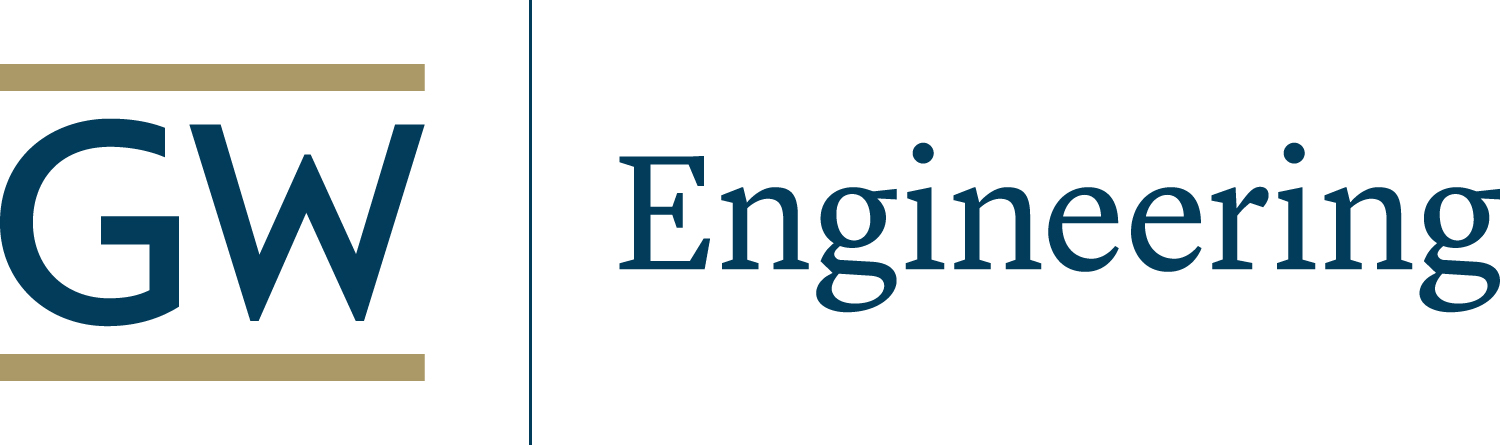

In [1]:
import warnings
warnings.filterwarnings("ignore")

Cartopy is a Python package designed to make drawing maps for data analysis and visualisation easy.


In [2]:
#Need to install this as Colab does not have it installed yet...
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 82.7 MB/s eta 0:00:00


A graphics processing unit (GPU) is an electronic circuit that performs mathematical calculations to process images and speed up the rendering of 3D computer graphics. GPUs are a key component of modern computing devices like laptops, game consoles, and smartphones. They are designed to handle graphics-related work like effects, videos, and graphics.

Optimized for Matrix Operations
Matrix Multiplications: Deep learning heavily relies on matrix and vector operations. GPUs are optimized for these kinds of operations, providing significant speedups in computations like those involved in forward and backward propagation in neural networks.

Deep Learning Frameworks Support
CUDA and cuDNN: Many deep learning frameworks, such as TensorFlow, PyTorch, and Keras, are optimized to take advantage of GPUs through NVIDIA's CUDA (Compute Unified Device Architecture) and cuDNN (CUDA Deep Neural Network library). These libraries provide low-level control over GPU resources, further accelerating deep learning computations.

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


california_housing_data*.csv is California housing data from the 1990 US Census; more information is available at: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [5]:
#Loading CSV into a Dataframe
df_cal = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [6]:
df_cal.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Lets use Matplotlib to explore the data.  Lat/Lon seems interesting.  Can we associate those datapoints with another features that shows a pattern?

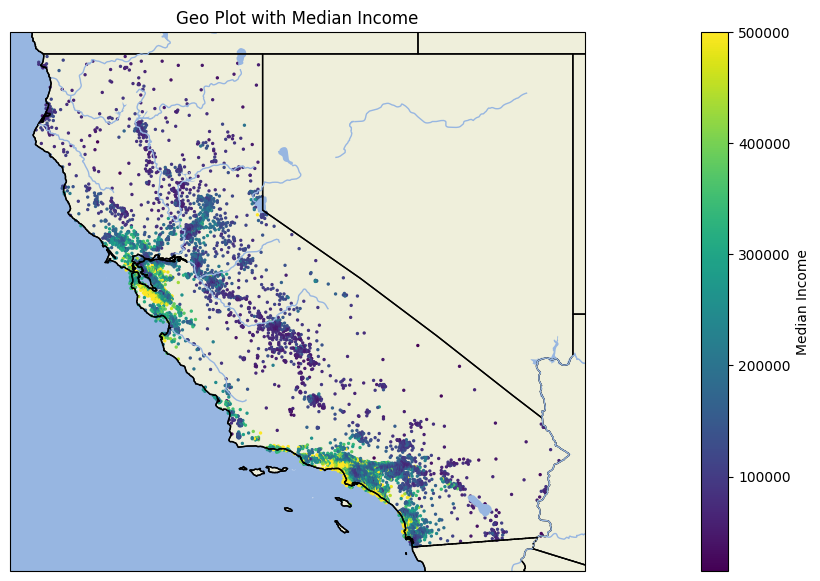

In [7]:
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')

scatter = ax.scatter(df_cal['longitude'], df_cal['latitude'], s=2, transform=ccrs.PlateCarree(), c=df_cal['median_house_value'], cmap='viridis')

cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)

cbar.set_label('Median Income')

plt.title('Geo Plot with Median Income')

plt.show()


Sampling in Pandas is effective when dealing with 'relatively' large datasets.

n: The number of rows (or columns) to return.
Example: df.sample(n=5) returns 5 randomly selected rows.

frac: Fraction of the data to return, rather than specifying an exact number of rows.
Example: df.sample(frac=0.5) returns 50% of the rows, chosen randomly.
n and frac are mutually exclusive, meaning you can only use one of them at a time.

replace: Whether to sample with or without replacement. If True, you can sample the same row more than once.
Default is False.
Example: df.sample(n=3, replace=True) might return the same row multiple times.

weights: If provided, samples are drawn according to the weights (probabilities). Can be a Series, list, or array-like object.
Example: df.sample(n=3, weights=[0.1, 0.2, 0.3, 0.4, 0.5]) gives higher probability to rows with higher weights.

random_state: A seed for the random number generator. Useful for reproducibility.
Example: df.sample(n=3, random_state=42) ensures the same sample is drawn every time you run the code.

axis: Determines whether you sample rows (axis=0, default) or columns (axis=1), Example: df.sample(n=2, axis=1) samples 2 columns instead of rows.

In [8]:
df_cal_sample = df_cal.sample(n=100)

In [9]:
df_cal_sample.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14932,-122.23,37.78,44.0,2340.0,825.0,2813.0,751.0,1.6009,118100.0
2103,-117.35,34.50,10.0,2163.0,392.0,1174.0,362.0,3.3750,98000.0
5635,-118.18,34.02,33.0,832.0,226.0,987.0,220.0,3.0972,125000.0
15544,-122.33,37.58,43.0,1772.0,422.0,1573.0,401.0,2.7474,233100.0
11252,-121.09,38.19,23.0,762.0,140.0,358.0,141.0,2.4545,105000.0


In [10]:
fraction = 0.05

# Perform stratified sampling by grouping by 'median age'
stratified_sample = df_cal.groupby('housing_median_age', group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=1))

In [11]:
stratified_sample.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5424,-118.16,34.60,2.0,11008.0,1549.0,4098.0,1367.0,6.4865,204400.0
11640,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,137900.0
11589,-121.28,38.59,3.0,4188.0,1136.0,2081.0,995.0,3.0481,92500.0
13350,-121.93,37.70,3.0,2456.0,582.0,793.0,456.0,4.4087,225600.0
2404,-117.56,34.12,4.0,5351.0,1210.0,2988.0,1101.0,3.7973,181300.0


Binning is a data preprocessing technique used to group continuous data into discrete intervals or "bins." This process helps in simplifying and analyzing the data, especially when dealing with continuous numerical variables. Binning can be useful in various contexts, such as data visualization, reducing noise, or preparing data for certain types of machine learning models.

In [12]:
#Create bins [0,10), [10,50), (50,200)
age_bins = [0, 10, 50, 200]

In [13]:
df_cal['age_bin'] = pd.cut(df_cal['housing_median_age'], bins=age_bins, labels=['new', 'mid', 'old'])


In [14]:
df_cal.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_bin
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,mid
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,mid
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,mid
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,mid
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,mid


As we saw last week, we can use loc to filter on a value in a column.

In [15]:
df_cal.loc[df_cal['age_bin'] == 'old'].head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_bin
325,-116.88,34.08,52.0,3419.0,777.0,710.0,265.0,3.9028,128600.0,old
1011,-117.10,32.76,52.0,2606.0,426.0,883.0,380.0,4.2813,270800.0,old
1074,-117.11,32.77,52.0,1506.0,233.0,478.0,240.0,4.3875,300000.0,old
1075,-117.11,32.77,52.0,1484.0,224.0,498.0,223.0,6.6053,331400.0,old
1103,-117.11,32.67,52.0,280.0,71.0,217.0,71.0,1.4844,83300.0,old


Calculating mean without a library, why would we every do that?

Validation: You might manually calculate the mean to validate the results from a library function, ensuring that the library is working as expected.

Lightweight Code: If you want to keep your code lightweight and avoid external dependencies, manually calculating the mean can eliminate the need for importing large libraries, which might be overkill for simple tasks.

In [16]:
# Calculate the sum of the numbers
total_sum = sum(df_cal['housing_median_age'])

# Calculate the number of elements in the list
count = len(df_cal)

# Calculate the mean
mean = total_sum / count

In [17]:
mean

28.58935294117647

Lets see mode

In [18]:
from collections import Counter

In [19]:
# Count the frequency of each number
frequency = Counter(df_cal['housing_median_age'])

# Find the highest frequency
max_frequency = max(frequency.values())

# Find the numbers with the highest frequency
mode = [num for num, freq in frequency.items() if freq == max_frequency]

# Print the mode(s)
print("Mode:", mode)

Mode: [52.0]


In [20]:
max_frequency

1052

Lastly, median is a little more involved, and a function is called for...

In [35]:
def calculate_median(numbers):
    # Sort the list of numbers
    sorted_numbers = sorted(numbers)

    # Calculate the number of data points
    n = len(sorted_numbers)

    # Find the median
    if n % 2 == 1:  # Odd number of data points
        median = sorted_numbers[n // 2]
    else:           # Even number of data points
        mid1 = sorted_numbers[n // 2 - 1]
        mid2 = sorted_numbers[n // 2]
        median = (mid1 + mid2) / 2

    return median

In [36]:
median = calculate_median(df_cal['housing_median_age'])

In [37]:
median

29.0

The np.cov function in NumPy is used to compute the covariance matrix of two or more variables. Covariance is a measure of how much two random variables vary together. The covariance matrix helps in understanding the relationship between the variables in multivariate data.

The np.outer function in NumPy computes the outer product of two vectors. Given two input arrays, a and b, np.outer(a, b) produces a matrix where each element is the product of an element from a and an element from b.

In [38]:
# Create a sample 2D array
data = np.array([
    [1, 500, 2],
    [2, 4, 3],
    [334, 3, 4],
    [4, 2, 5],
    [5, 1, 634234]
])

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

# Calculate the standard deviations
std_devs = np.sqrt(np.diag(cov_matrix))

# Calculate the correlation matrix
corr_matrix = cov_matrix / np.outer(std_devs, std_devs)

In [39]:
corr_matrix

array([[ 1.        , -0.25631669, -0.24243229],
       [-0.25631669,  1.        , -0.2537686 ],
       [-0.24243229, -0.2537686 ,  1.        ]])

Again, just use the library in most cases.

In [40]:
df1 = pd.DataFrame(data, columns=['A', 'B', 'C'], index=['Row1', 'Row2', 'Row3', 'Row4', 'Row5'])

correlation_matrix = df1.corr()
print(correlation_matrix)

          A         B         C
A  1.000000 -0.256317 -0.242432
B -0.256317  1.000000 -0.253769
C -0.242432 -0.253769  1.000000


Back to the housing dataset.

In [41]:
df_cal[['households', 'population', 'median_income']].cov()

,households,population,median_income
households,147856.277053,4.013172e+05,5.608393
population,401317.218749,1.317566e+06,-1.396588
median_income,5.608393,-1.396588e+00,3.641061


In [42]:
df_cal[['households', 'population', 'median_income']].corr()

,households,population,median_income
households,1.000000,0.909247,0.007644
population,0.909247,1.000000,-0.000638
median_income,0.007644,-0.000638,1.000000


Benefits of Frequency Tables
Data Summary:

**Concise Overview**: Summarizes large datasets by showing the count or frequency of each unique value or category.
Initial Insight: Provides a quick snapshot of the distribution of values in the dataset.
Data Analysis:

**Identify Patterns**: Helps in identifying patterns, trends, and anomalies in categorical or discrete data.
Understand Distribution: Shows how data points are distributed across different categories or ranges.
Data Cleaning:

**Detect Errors**: Helps in spotting inconsistencies or data entry errors by showing unexpected frequencies or outliers.
Missing Values: Can highlight missing or unexpected values that need attention.
Visualization:

**Foundation for Graphs**: Provides the basis for creating bar charts, histograms, or pie charts, making it easier to visualize the data distribution.
Statistical Analysis:

**Mode Calculation**: Helps in identifying the most frequent category or value (the mode) in the dataset.

**Proportions and Percentages**: Allows calculation of proportions or percentages of each category relative to the total dataset.
Comparative Analysis:

**Cross-tabulations**: Useful for comparing the frequencies of two or more categorical variables in contingency tables or cross-tabulations.

In [43]:
# Create a  Series
data = df_cal['age_bin']

# Create a DataFrame for frequency and relative frequency
frequency_table = data.value_counts().reset_index()
frequency_table.columns = ['Value', 'Frequency']

# Calculate relative frequency
frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table['Frequency'].sum()

print("Frequency Table with Relative Frequency:")
print(frequency_table)

Frequency Table with Relative Frequency:
  Value  Frequency  Relative Frequency
0   mid      14603            0.859000
1   new       1313            0.077235
2   old       1084            0.063765


### ***Simple Linear Regression***

There are some limitations with scikitlearn, so we will also do this with statsmodel as in the book.

Mean Squared Error: 0.92
R^2 Score: 0.65
Coefficients:  [[2.9902591]]
Intercept:  [4.20634019]


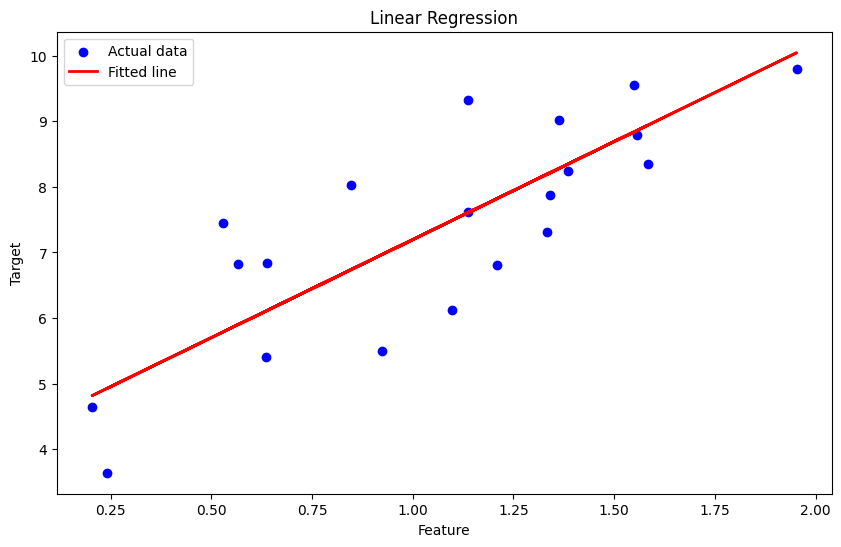

In [44]:
# Linear Regression Example
'''
This demonstrates how to perform linear regression using the `scikit-learn` library.
'''

# Generate a sample dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = model.coef_
intercept = model.intercept_

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)


# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()


### **Linear Regression with the Housing Data**

In [45]:
X = df_cal[['median_income']] # notice we need to have a 2d structure - hence [[]]
y = df_cal['median_house_value']

Another way of looking at the first 4 rows...

In [46]:
X[:4]

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917


Mean Squared Error: 6920028496.01
Mean Absolute Error: 62164.20
R^2 Score: 0.50


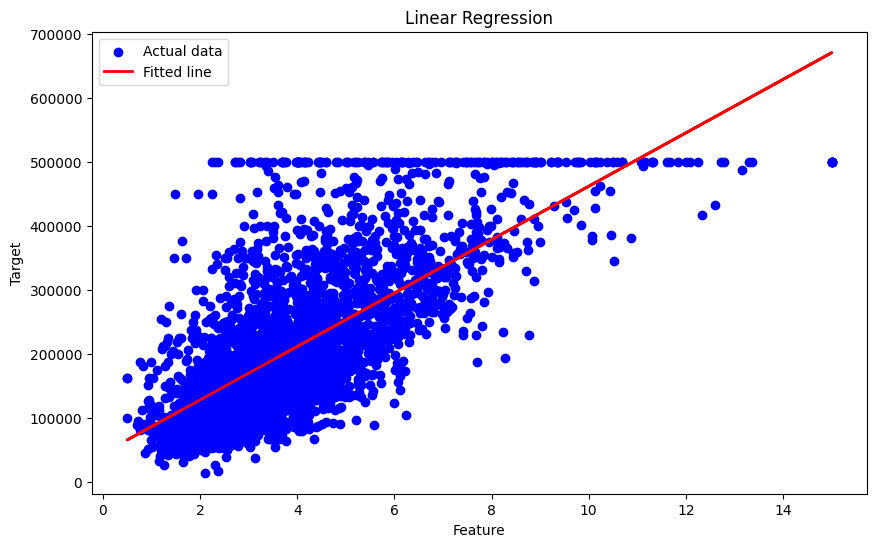

In [47]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
results = model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [48]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Get model parameters
coefficients = model.coef_
intercept = model.intercept_

# Print summary
print("Model Performance Summary:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Model Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Model Performance Summary:
Mean Squared Error (MSE): 6920028496.01
R-squared (R²): 0.50
Mean Absolute Error (MAE): 62164.20
Model Coefficients: [41669.93554652]
Intercept: 45238.285506641725


The limitation is basically not all metrics are readily availailable and you may beed to compute them.  For example, there isnt a easy way to get SE from scikitlearn.  Recall, SE is the estimate in regression analysis measures the average distance that the observed values fall from the predicted values (the regression line). It provides a way to quantify the precision of the predictions made by the regression model  To get it, use something like this:

In [49]:
# Number of observations
n = len(y_test)

# Compute residuals
residuals = np.array(y_test) - np.array(y_pred)

# Compute residual variance
residual_variance = np.var(residuals, ddof=1)  # Use ddof=1 for sample variance or 0 for population

# Calculate Standard Error
standard_error = np.sqrt(residual_variance / n)

print(f'Standard Error: {standard_error}')


Standard Error: 1426.7087808012166


Some more metrics you can find outside of scikitlearn

In [54]:
# Define feature and target variables
X = df_cal[['median_income']]
y = df_cal['median_house_value']

# Add a constant to the model (intercept)
X_with_const = np.c_[np.ones(X.shape[0]), X]  # Adding the intercept term

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_with_const, y, test_size=0.2, random_state=0)

# Fit the model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions and residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Calculate the residual variance
residual_variance = np.sum(residuals**2) / (X_test.shape[0] - X_test.shape[1])

# Calculate the variance-covariance matrix
X_transpose_X_inv = np.linalg.inv(np.dot(X_test.T, X_test))
variance_covariance_matrix = residual_variance * X_transpose_X_inv

# Standard errors of coefficients
standard_errors = np.sqrt(np.diag(variance_covariance_matrix))

# t-statistics
t_stats = model.coef_ / standard_errors

# p-values
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=X_test.shape[0] - X_test.shape[1]))

# Print results
print("Coefficients:", model.coef_)
print("Standard Errors:", standard_errors)
print("t-Statistics:", t_stats)
print("p-Values:", p_values)


Coefficients: [    0.         42010.27641154]
Standard Errors: [3304.4975862   782.84817441]
t-Statistics: [ 0.         53.66337661]
p-Values: [1. 0.]


In [52]:
X_with_const

array([[1.    , 1.4936],
       [1.    , 1.82  ],
       [1.    , 1.6509],
       ...,
       [1.    , 3.0313],
       [1.    , 1.9797],
       [1.    , 3.0147]])

### ***Multiple Linear Regression***



Fit the Linear Regression Model: Use OLS in statsmodel to fit the model and obtain predictions and residuals.

Calculate the Standard Error: Compute the standard error for each coefficient using residuals and the design matrix.

Calculate the t-statistic: Use the formula for the t-statistic with the estimated coefficients and their standard errors.

Calculate the p-value: Determine the p-value from the t-statistic using the t-distribution.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X = df_cal

X['home_age_labeled'] = label_encoder.fit_transform(X['age_bin'])
X = df_cal.drop(['median_house_value', 'housing_median_age', 'age_bin'], axis = 1)
ones = pd.Series(1, index=data.index)
X.insert(0, 'Intercept', ones)
terms = X.columns

y = df_cal['median_house_value']

In [ ]:
X

,Intercept,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,home_age_labeled
0,1,-114.31,34.19,5612.0,1283.0,1015.0,472.0,1.4936,0
1,1,-114.47,34.40,7650.0,1901.0,1129.0,463.0,1.8200,0
2,1,-114.56,33.69,720.0,174.0,333.0,117.0,1.6509,0
3,1,-114.57,33.64,1501.0,337.0,515.0,226.0,3.1917,0
4,1,-114.57,33.57,1454.0,326.0,624.0,262.0,1.9250,0
...,...,...,...,...,...,...,...,...,...
16995,1,-124.26,40.58,2217.0,394.0,907.0,369.0,2.3571,2
16996,1,-124.27,40.69,2349.0,528.0,1194.0,465.0,2.5179,0
16997,1,-124.30,41.84,2677.0,531.0,1244.0,456.0,3.0313,0
16998,1,-124.30,41.80,2672.0,552.0,1298.0,478.0,1.9797,0


In [ ]:
terms

Index(['Intercept', 'longitude', 'latitude', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'home_age_labeled'],
      dtype='object')

In [ ]:
model1 = sm.OLS(y, X)
results1 = model1.fit()

In [ ]:
results1.tvalues

,0
Intercept,-58.102680
longitude,-61.755660
latitude,-64.790830
total_rooms,-11.666019
total_bedrooms,13.585305
population,-32.225501
households,6.552583
median_income,106.433948
home_age_labeled,14.806177


In [ ]:
results1.pvalues

,0
Intercept,0.000000e+00
longitude,0.000000e+00
latitude,0.000000e+00
total_rooms,2.503036e-31
total_bedrooms,8.094360e-42
population,3.352179e-221
households,5.817503e-11
median_income,0.000000e+00
home_age_labeled,2.711149e-49


In [ ]:
results1.rsquared

0.6337160476484267

In [ ]:
results1.centered_tss

228674518990667.4

In [ ]:
results1.fvalue

3674.563578497766

Interpretation of VIF
VIF = 1: Indicates that there is no correlation between the predictor variable in question and the other predictor variables. In other words, the predictor variable is not affected by multicollinearity, and its variance is not inflated.

VIF > 1: Indicates that the predictor variable is correlated with other predictor variables. The higher the VIF, the greater the degree of multicollinearity and the larger the variance inflation.

Common Thresholds:

VIF > 10: Often considered a sign of high multicollinearity, which may suggest that the predictor variable could be problematic and might need further investigation or removal.

In [ ]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
longitude,8.197582
latitude,8.346202
total_rooms,12.429168
total_bedrooms,36.919185
population,6.533689
households,37.111030
median_income,1.709753
home_age_labeled,1.028773


Coefficients: results1.params returns a Pandas Series (or a similar object) where each element is the estimated coefficient for the corresponding predictor in the model.

In [ ]:
results1.params

,0
Intercept,-3.948523e+06
longitude,-4.748604e+04
latitude,-4.716079e+04
total_rooms,-1.016002e+01
total_bedrooms,1.054618e+02
population,-3.864464e+01
households,5.590374e+01
median_income,3.927620e+04
home_age_labeled,1.500770e+04
